In [40]:
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [42]:
model = Sequential()
model.add(Conv2D(32,3,3, input_shape = (224,224,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(output_dim=128,activation = 'relu', init='random_uniform'))
model.add(Dense(output_dim=20,activation='relu',init='random_uniform'))
model.add(Dense(output_dim=6,activation = 'sigmoid', init='random_uniform'))
model.compile(optimizer = 'adam' , loss= 'binary_crossentropy', metrics = ['accuracy'])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(224, 224,..., activation="relu")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128, kernel_initializer="random_uniform")`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="random_uniform")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=6, kernel_initializer="random_uniform")`
  import sys


In [43]:
from keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2 , zoom_range = 0.2, horizontal_flip = True)
v_train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2 , zoom_range = 0.2, horizontal_flip = True)#to the images we apply few geometrical transformations to avoid over fitting
test_datagen = ImageDataGenerator(rescale = 1./255)
x_train = train_datagen.flow_from_directory(r'DataSet\seg_train', target_size = (224,224),  batch_size = 32, class_mode = 'categorical')
x_val_train=v_train_datagen.flow_from_directory(r'DataSet\seg_pred',target_size = (224,224),  batch_size = 32, class_mode = 'categorical')
x_test = train_datagen.flow_from_directory(r'DataSet\seg_test', target_size = (224,224),  batch_size = 32, class_mode = 'categorical')


Found 291 images belonging to 6 classes.
Found 144 images belonging to 1 classes.
Found 353 images belonging to 6 classes.


In [45]:
print(training_set.class_indices)

{'Boronsit': 0, 'Penomoni': 1, 'Possible Covid': 2, 'covidct': 3, 'normalct': 4, 'possible Penomoni': 5}


In [46]:
labels = train_data.class_indices
labels

{'Boronsit': 0,
 'Penomoni': 1,
 'Possible Covid': 2,
 'covidct': 3,
 'normalct': 4,
 'possible Penomoni': 5}

In [47]:
labels.items()

dict_items([('Boronsit', 0), ('Penomoni', 1), ('Possible Covid', 2), ('covidct', 3), ('normalct', 4), ('possible Penomoni', 5)])

In [48]:
#Keep firstcolumn(key) as index and second column(value) as Class label name 
labels = dict((b,a) for a,b in labels.items()) 
labels

{0: 'Boronsit',
 1: 'Penomoni',
 2: 'Possible Covid',
 3: 'covidct',
 4: 'normalct',
 5: 'possible Penomoni'}

In [ ]:
#Obtain filenames for Prediction
#filename = val_data.filenames
#filename

In [51]:
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the CNN to the images

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('DataSet\seg_train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('DataSet\seg_test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

classifier.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs = 3,
                         validation_data = test_set,
                         validation_steps = 50)

Found 291 images belonging to 6 classes.
Found 353 images belonging to 6 classes.
Epoch 1/3
10/10 [==============================] - 115s 11s/step - loss: 1.2492 - acc: 0.7782 - val_loss: 0.5297 - val_acc: 0.8333
Epoch 2/3
10/10 [==============================] - 73s 7s/step - loss: 0.5320 - acc: 0.8328 - val_loss: 0.5267 - val_acc: 0.8333
Epoch 3/3
10/10 [==============================] - 69s 7s/step - loss: 0.4710 - acc: 0.8328 - val_loss: 0.4613 - val_acc: 0.8333


In [52]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 93312)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               11944064  
_________________________________________________________________
dense_32 (Dense)             (None, 6)                 774       
Total para

This Xray Image is of Negative covid-19 patient


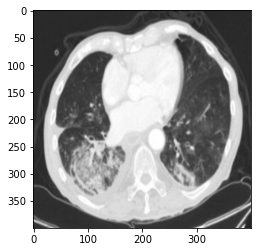

In [63]:
import numpy as np
# from google.colab.patches import cv2_imshow
from keras.preprocessing import image
xtest_image = image.load_img('0.jpg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict_classes(xtest_image)
# training_set.class_indices

imggg = cv2.imread('0.jpg')
print("This Xray Image is of Negative covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)

In [53]:
#model.save('Pneumonina_CNN.h5')

In [67]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense

from keras.models import Sequential, Model
#rom keras.applications.xception import Xception
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as np

import matplotlib.pyplot as plt
%matplotlib inline


In [85]:
DATASET_DIR = "Ct_Scan_Dataset"

IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)


In [69]:
os.listdir(DATASET_DIR)

['Boronsit',
 'covidct',
 'normalct',
 'Penomoni',
 'Possible Covid',
 'possible Penomoni']

In [80]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('sigmoid'))

In [81]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#model.compile(Adam(lr=0.0001),loss="binary_crossentropy", metrics=["accuracy"])


In [82]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
activation_11 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_12 (Activation)   (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 52, 52, 64)        18496     
__________

In [83]:
# #Data Preprocessing
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


train_data = train_datagen.flow_from_directory('DataSet/seg_train',
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          class_mode = 'categorical')
test_data = test_datagen.flow_from_directory('DataSet/seg_test',
                                          target_size=(224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')
val_data = val_datagen.flow_from_directory('DataSet/seg_pred',
                                          target_size=(224,224),
                                          batch_size = 32,
                                          shuffle=False, 
                                          class_mode = None) #Test with new data



Found 291 images belonging to 6 classes.
Found 353 images belonging to 6 classes.
Found 144 images belonging to 1 classes.


In [87]:
NB_CLASSES = 6
EPOCHS = 3
BATCH_SIZE = 8

history = model.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs = 3,
                         validation_data = test_set,
                         validation_steps = 50)

Epoch 1/3
10/10 [==============================] - 81s 8s/step - loss: 0.4738 - acc: 0.8286 - val_loss: 0.4609 - val_acc: 0.8333
Epoch 2/3
10/10 [==============================] - 80s 8s/step - loss: 0.4923 - acc: 0.8297 - val_loss: 0.5184 - val_acc: 0.8069
Epoch 3/3
10/10 [==============================] - 82s 8s/step - loss: 0.4897 - acc: 0.8212 - val_loss: 0.4491 - val_acc: 0.8333


In [90]:
NB_CLASSES = 6
EPOCHS = 3
BATCH_SIZE = 8

                                          
history = model.fit_generator(train_data,
                         steps_per_epoch = 10,
                         epochs = 3,
                         validation_steps = 50)
#val_data = test_data,

Epoch 1/3
10/10 [==============================] - 31s 3s/step - loss: 0.4699 - acc: 0.8318
Epoch 2/3
10/10 [==============================] - 30s 3s/step - loss: 0.4866 - acc: 0.8270
Epoch 3/3
10/10 [==============================] - 29s 3s/step - loss: 0.4782 - acc: 0.8267


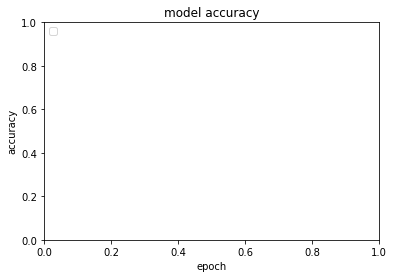

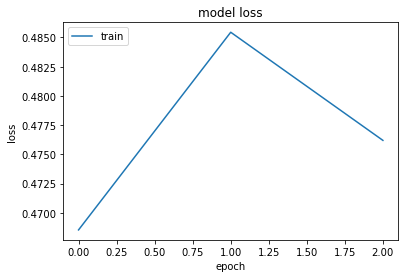

In [92]:
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

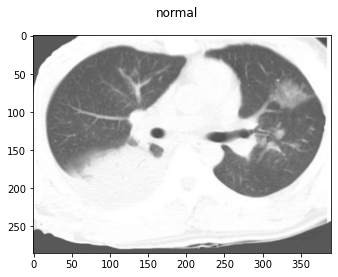

In [93]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normalct/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[5], cmap='gray') 


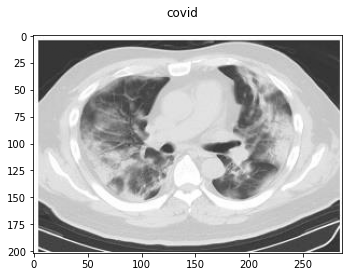

In [94]:
covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covidct/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray') 
